In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
test = pd.read_csv('test.csv')

In [4]:
test

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,saledate
0,2005,Cadillac,CTS,Base,Sedan,automatic,1g6dp567450124779,ca,2.7,116970.0,silver,black,lexus of stevens creek,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
1,2014,GMC,Savana Cargo,2500,Van,NaN,1gtw7fca7e1902207,pa,4.4,6286.0,white,gray,u-haul,Fri Feb 27 2015 01:00:00 GMT-0800 (PST)
2,2013,Nissan,Murano,S,SUV,automatic,jn8az1mw6dw303497,oh,4.6,11831.0,gray,black,nissan-infiniti lt,Tue Feb 24 2015 01:30:00 GMT-0800 (PST)
3,2013,Chevrolet,Impala,LS Fleet,Sedan,automatic,2g1wf5e34d1160703,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,Fri Mar 06 2015 02:00:00 GMT-0800 (PST)
4,2013,Nissan,Titan,SV,Crew Cab,automatic,1n6aa0ec3dn301209,tn,2.9,31083.0,black,black,nissan north america inc.,Wed Jun 03 2015 03:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,2011,Jeep,Wrangler,Sport,SUV,automatic,1j4aa2d17bl584330,ca,3.8,66085.0,orange,black,dtg operations inc,Thu Jan 15 2015 03:30:00 GMT-0800 (PST)
110054,2014,Lexus,IS 250,Base,sedan,automatic,jthbf1d23e5007526,fl,4.8,17588.0,gray,black,lexus financial services,Mon Jun 15 2015 11:00:00 GMT-0700 (PDT)
110055,2004,Nissan,Maxima,3.5 SL,Sedan,automatic,1n4ba41e54c831950,va,2.9,124036.0,silver,gray,shirlie slack mitsubishi,Thu Feb 05 2015 01:35:00 GMT-0800 (PST)
110056,2013,Nissan,370Z,Base,coupe,manual,jn1az4eh3dm382431,tx,2.2,27169.0,—,black,nissan motor acceptance corporation,Wed Jun 17 2015 03:30:00 GMT-0700 (PDT)


In [5]:
train = pd.read_csv('train.csv')
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST)
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST)


In [6]:
example = pd.read_csv('sample_submission.csv')
example

,vin,sellingprice
0,1g6dp567450124779,13592.209588
1,1gtw7fca7e1902207,13592.209588
2,jn8az1mw6dw303497,13592.209588
3,2g1wf5e34d1160703,13592.209588
4,1n6aa0ec3dn301209,13592.209588
...,...,...
110053,1j4aa2d17bl584330,13592.209588
110054,jthbf1d23e5007526,13592.209588
110055,1n4ba41e54c831950,13592.209588
110056,jn1az4eh3dm382431,13592.209588


In [7]:
example.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   vin           110058 non-null  object 
 1   sellingprice  110058 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.7+ MB


In [8]:
test.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'saledate'],
      dtype='object')

In [9]:
train.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'sellingprice',
       'saledate'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          440236 non-null  int64  
 1   make          432193 non-null  object 
 2   model         432113 non-null  object 
 3   trim          431899 non-null  object 
 4   body          429843 non-null  object 
 5   transmission  388775 non-null  object 
 6   vin           440236 non-null  object 
 7   state         440236 non-null  object 
 8   condition     430831 non-null  float64
 9   odometer      440167 non-null  float64
 10  color         439650 non-null  object 
 11  interior      439650 non-null  object 
 12  seller        440236 non-null  object 
 13  sellingprice  440236 non-null  int64  
 14  saledate      440236 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 50.4+ MB


In [11]:
train.duplicated().sum()

0

In [12]:
train['vin'].duplicated().sum()

0

In [13]:
train['year'].drop_duplicates().sort_values()

250627    1982
106264    1983
191684    1984
31280     1985
31287     1986
7349      1987
6666      1988
3756      1989
8779      1990
4097      1991
10128     1992
2479      1993
475       1994
934       1995
166       1996
414       1997
127       1998
89        1999
8         2000
86        2001
76        2002
3         2003
17        2004
9         2005
13        2006
4         2007
19        2008
58        2009
6         2010
0         2011
2         2012
5         2013
1         2014
62        2015
Name: year, dtype: int64

In [14]:
train

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,Ford,Edge,SEL,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Ford,Fusion,SE,Sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,Nissan,Sentra,2.0 SL,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,HUMMER,H2,Base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,Ford,Fusion,SEL,Sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,Kia,Optima,EX Hybrid,Sedan,automatic,knagm4ad4d5057805,ca,4.5,20434.0,white,beige,"kia motors america, inc",16000,Tue Jan 20 2015 04:30:00 GMT-0800 (PST)
440232,2014,MINI,Cooper Countryman,S ALL4,Wagon,automatic,wmwzc5c55ewp36517,wi,2.9,14675.0,white,black,bmw mini financial services,24250,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
440233,2008,BMW,6 Series,650i,Coupe,automatic,wbaea53588cv90110,ca,3.7,102552.0,gray,black,studio city auto group,16750,Tue Mar 03 2015 04:30:00 GMT-0800 (PST)
440234,2014,Ram,2500,SLT,Crew Cab,automatic,3c6ur5dl2eg243568,tx,3.0,29367.0,white,gray,express car & truck rental,33000,Wed Jan 14 2015 02:05:00 GMT-0800 (PST)


In [15]:
median_condition = train['condition'].median()
median_odometer = train['odometer'].median()

In [118]:
train_mod = train
train_mod['condition']=train_mod['condition'].fillna(median_condition)
train_mod['odometer']=train_mod['odometer'].fillna(median_odometer)
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          440236 non-null  int64         
 1   make          440236 non-null  object        
 2   model         440236 non-null  object        
 3   trim          440236 non-null  object        
 4   body          440236 non-null  object        
 5   transmission  440236 non-null  object        
 6   vin           440236 non-null  object        
 7   state         440236 non-null  object        
 8   condition     440236 non-null  float64       
 9   odometer      440236 non-null  float64       
 10  color         440236 non-null  object        
 11  interior      440236 non-null  object        
 12  seller        440236 non-null  object        
 13  sellingprice  440236 non-null  int64         
 14  saledate      440236 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [17]:
train_mod['make'].unique()

array(['Ford', 'Nissan', 'HUMMER', 'Lincoln', 'pontiac', 'Hyundai', nan,
       'Buick', 'Chevrolet', 'Honda', 'Acura', 'Cadillac', 'GMC', 'Saab',
       'Dodge', 'Mercedes-Benz', 'Toyota', 'Volkswagen', 'BMW',
       'Infiniti', 'Chrysler', 'Kia', 'Jaguar', 'Subaru', 'Jeep', 'Lexus',
       'mercedes', 'Scion', 'FIAT', 'Suzuki', 'Mazda', 'Volvo', 'Audi',
       'MINI', 'Isuzu', 'Mitsubishi', 'smart', 'Pontiac', 'Porsche',
       'subaru', 'ford', 'Land Rover', 'chrysler', 'Saturn', 'mazda',
       'dodge', 'Ram', 'Oldsmobile', 'hyundai', 'Mercury', 'Bentley',
       'toyota', 'lincoln', 'Fisker', 'nissan', 'chevrolet', 'honda',
       'porsche', 'mitsubishi', 'lexus', 'bmw', 'Maserati', 'acura',
       'jeep', 'mercury', 'Tesla', 'landrover', 'vw', 'cadillac', 'buick',
       'gmc truck', 'land rover', 'volkswagen', 'Rolls-Royce', 'audi',
       'Ferrari', 'suzuki', 'Plymouth', 'oldsmobile', 'Lamborghini',
       'gmc', 'Geo', 'ford truck', 'Aston Martin', 'plymouth', 'Daewoo',
      

In [119]:
lower_columns = ['make', 'model', 'trim', 'body', 'transmission', 'vin','state', 'color', 'interior', 'seller']
for i in lower_columns:
    train_mod[i]=train_mod[i].str.lower()
train_mod['make'].unique()

array(['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', '—',
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream'], dtype=object)

In [19]:
train_mod['make'].unique()

array(['ford', 'nissan', 'hummer', 'lincoln', 'pontiac', 'hyundai', nan,
       'buick', 'chevrolet', 'honda', 'acura', 'cadillac', 'gmc', 'saab',
       'dodge', 'mercedes-benz', 'toyota', 'volkswagen', 'bmw',
       'infiniti', 'chrysler', 'kia', 'jaguar', 'subaru', 'jeep', 'lexus',
       'mercedes', 'scion', 'fiat', 'suzuki', 'mazda', 'volvo', 'audi',
       'mini', 'isuzu', 'mitsubishi', 'smart', 'porsche', 'land rover',
       'saturn', 'ram', 'oldsmobile', 'mercury', 'bentley', 'fisker',
       'maserati', 'tesla', 'landrover', 'vw', 'gmc truck', 'rolls-royce',
       'ferrari', 'plymouth', 'lamborghini', 'geo', 'ford truck',
       'aston martin', 'daewoo', 'mercedes-b', 'dodge tk', 'mazda tk',
       'dot', 'airstream'], dtype=object)

In [129]:
def make_duplicates(name):
    if (name=='mercedes-benz') or (name=='mercedes-b'):
        return 'mercedes'
    elif name=='mazda tk':
        return 'mazda'
    elif name == 'vw':
        return 'volkswagen'
    elif name == 'gmc truck':
        return 'gmc'
    elif name == 'ford truck':
        return 'ford'
    elif name == 'airstream':
        return 'mercedes'
    elif name == 'dodge tk':
        return 'dodge'
    else:
        return name

In [130]:
features_train['make']=features_train['make'].apply(make_duplicates)

In [20]:
train_mod['model'].unique()

array(['edge', 'fusion', 'sentra', 'h2', 'mkz', 'g6', 'escape', 'elantra',
       'freestyle', nan, 'lucerne', 'windstar', 'silverado 1500',
       'murano', 'equinox', 'accord', 'civic', 'mdx', 'cts', 'taurus',
       'srx', 'yukon', '9-3', 'explorer', 'f-150', 'charger', 'armada',
       'gl-class', 'avalon', 'tahoe', 'malibu', 'passat', 'camry', 'flex',
       '3 series', 'q50', 'altima', 'mustang', '300', 'sonata',
       'envoy xl', 'rogue', 'accent', 'maxima', 'forte', 'xf', 'outback',
       'grand caravan', 'e-class', 'cherokee', 'impala', 'optima',
       '5 series', 'expedition', 'is 250', 'mks', '200', 'veloster',
       'golf', 'rav4', 'e300dt', 'five hundred', 'g coupe',
       'grand cherokee', 'x-type', 'g convertible', 'tacoma', 'xa',
       'g sedan', 'tl', 'liberty', 'soul', '500l', 'town and country',
       'hhr', 'wrangler', 'reno', 'suburban', 'pt cruiser', 'gx 460',
       'sienna', 'sl-class', 'envoy', 'patriot', 'e-series van', 'versa',
       'aspen', 'm', 'co

In [21]:
train_mod['trim'].unique()

array(['sel', 'se', '2.0 sl', ..., '2.5 x l.l.bean edition',
       '3500 high roof 140 wb', '4x4 v6 xlt sport'], dtype=object)

In [22]:
train_mod['body'].unique()

array(['suv', 'sedan', nan, 'wagon', 'minivan', 'extended cab',
       'regular cab', 'coupe', 'supercrew', 'convertible', 'crew cab',
       'supercab', 'hatchback', 'g coupe', 'g convertible', 'access cab',
       'g sedan', 'e-series van', 'quad cab', 'tsx sport wagon', 'van',
       'cts coupe', 'koup', 'king cab', 'double cab', 'elantra coupe',
       'crewmax cab', 'genesis coupe', 'g37 coupe', 'club cab',
       'beetle convertible', 'mega cab', 'regular-cab', 'xtracab',
       'q60 coupe', 'promaster cargo van', 'cts-v coupe', 'cts wagon',
       'cab plus 4', 'g37 convertible', 'transit van', 'q60 convertible',
       'cab plus', 'ram van', 'granturismo convertible', 'cts-v wagon'],
      dtype=object)

In [23]:
train_mod['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

In [24]:
train_mod['color'].unique()

array(['black', 'gold', 'silver', 'blue', 'white', 'gray', '—', 'red',
       'brown', 'green', 'beige', 'orange', nan, 'off-white', 'burgundy',
       'yellow', 'charcoal', 'purple', 'turquoise', 'lime', 'pink'],
      dtype=object)

In [25]:
train_mod['interior'].unique()

array(['black', 'beige', 'gray', 'tan', 'brown', '—', 'off-white', nan,
       'blue', 'white', 'silver', 'red', 'green', 'gold', 'purple',
       'orange', 'burgundy', 'yellow'], dtype=object)

In [26]:
train_mod['seller'].unique()

array(['santander consumer', 'ars/avis budget group',
       'nissan-infiniti lt', ..., 'autostar enterprises',
       'kocourek nissan', 'studio city auto group'], dtype=object)

In [131]:
fillna_columns=['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
for i in fillna_columns:
    train_mod[i]=train_mod[i].fillna('—')
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          440236 non-null  int64         
 1   make          440236 non-null  object        
 2   model         440236 non-null  object        
 3   trim          440236 non-null  object        
 4   body          440236 non-null  object        
 5   transmission  440236 non-null  object        
 6   vin           440236 non-null  object        
 7   state         440236 non-null  object        
 8   condition     440236 non-null  float64       
 9   odometer      440236 non-null  float64       
 10  color         440236 non-null  object        
 11  interior      440236 non-null  object        
 12  seller        440236 non-null  object        
 13  sellingprice  440236 non-null  int64         
 14  saledate      440236 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [28]:
train_mod.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,Wed Jun 10 2015 02:30:00 GMT-0700 (PDT)
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,Wed Jun 17 2015 03:00:00 GMT-0700 (PDT)
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,Tue Feb 03 2015 04:00:00 GMT-0800 (PST)


In [121]:
train_mod['saledate']=pd.to_datetime(train_mod['saledate'], format='%a %b %d %Y', exact=False)

In [132]:
train_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          440236 non-null  int64         
 1   make          440236 non-null  object        
 2   model         440236 non-null  object        
 3   trim          440236 non-null  object        
 4   body          440236 non-null  object        
 5   transmission  440236 non-null  object        
 6   vin           440236 non-null  object        
 7   state         440236 non-null  object        
 8   condition     440236 non-null  float64       
 9   odometer      440236 non-null  float64       
 10  color         440236 non-null  object        
 11  interior      440236 non-null  object        
 12  seller        440236 non-null  object        
 13  sellingprice  440236 non-null  int64         
 14  saledate      440236 non-null  datetime64[ns]
dtypes: datetime64[ns]

In [31]:
train_mod.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2011,ford,edge,sel,suv,automatic,2fmdk3jc4bba41556,md,4.2,111041.0,black,black,santander consumer,12500,2015-06-02
1,2014,ford,fusion,se,sedan,automatic,3fa6p0h75er208976,mo,3.5,31034.0,black,black,ars/avis budget group,14500,2015-02-25
2,2012,nissan,sentra,2.0 sl,sedan,automatic,3n1ab6ap4cl698412,nj,2.2,35619.0,black,black,nissan-infiniti lt,9100,2015-06-10
3,2003,hummer,h2,base,suv,automatic,5grgn23u93h101360,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,13300,2015-06-17
4,2007,ford,fusion,sel,sedan,automatic,3fahp08z17r268380,md,2.0,127709.0,black,black,purple heart,1300,2015-02-03


**Вынесем отдельно колонку с целевым признаком**

In [133]:
target_train = train_mod['sellingprice']

In [134]:
features_train = train_mod.drop(columns=['vin', 'sellingprice'],axis=1)

Исследование характеристик

In [135]:
train_mod.drop(columns=['vin'],axis=1).corr()

,year,condition,odometer,sellingprice
year,1.000000,0.534360,-0.774199,0.586847
condition,0.534360,1.000000,-0.524827,0.529901
odometer,-0.774199,-0.524827,1.000000,-0.582933
sellingprice,0.586847,0.529901,-0.582933,1.000000


<AxesSubplot:>

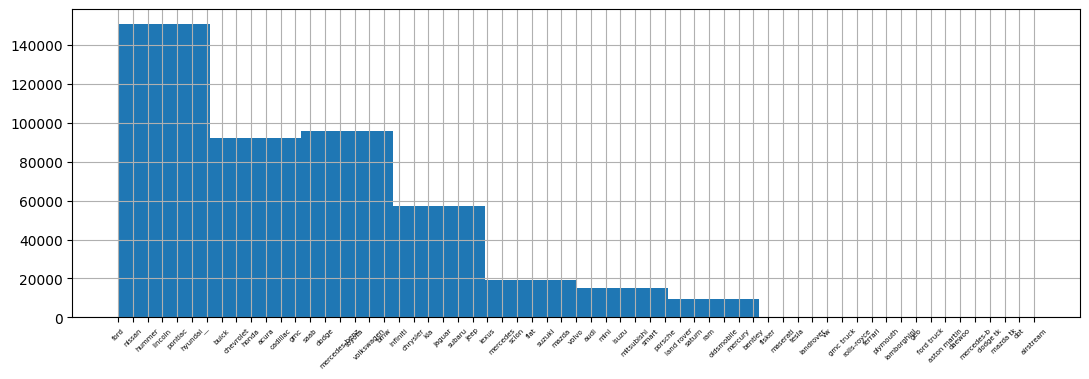

In [136]:
features_train['make'].hist(xlabelsize=5, xrot=45, figsize = (13,4))

<AxesSubplot:>

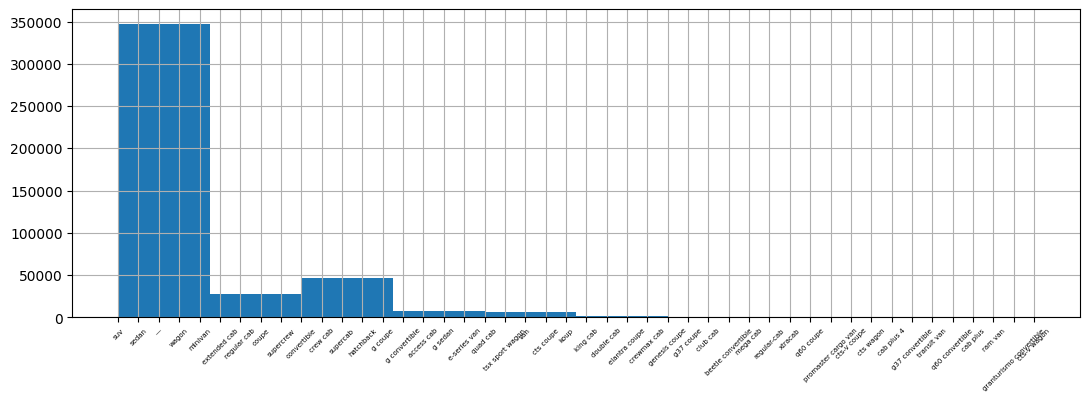

In [137]:
features_train['body'].hist(xlabelsize=5, xrot=45, figsize = (13,4))

<AxesSubplot:>

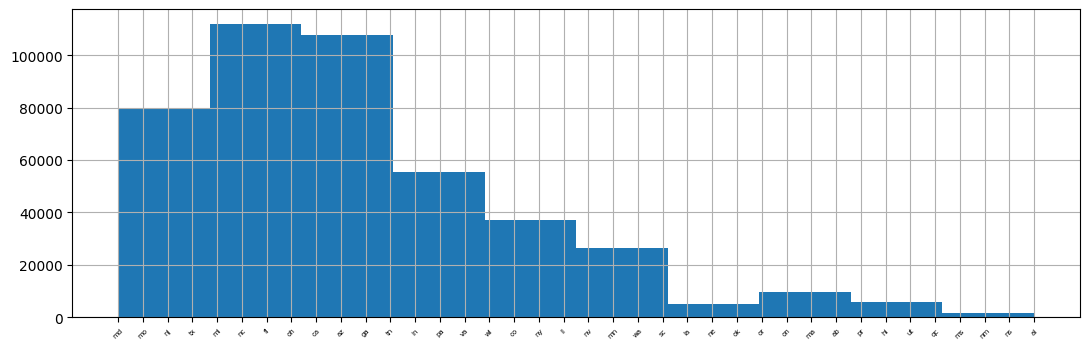

In [138]:
features_train['state'].hist(xlabelsize=5, xrot=45, figsize = (13,4))

**Оставим только наиболее часто встречающиеся значения категориальных признаков**

In [139]:
features_train

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,saledate
0,2011,ford,edge,sel,suv,automatic,md,4.2,111041.0,black,black,santander consumer,2015-06-02
1,2014,ford,fusion,se,sedan,automatic,mo,3.5,31034.0,black,black,ars/avis budget group,2015-02-25
2,2012,nissan,sentra,2.0 sl,sedan,automatic,nj,2.2,35619.0,black,black,nissan-infiniti lt,2015-06-10
3,2003,hummer,h2,base,suv,automatic,tx,2.8,131301.0,gold,beige,wichita falls ford lin inc,2015-06-17
4,2007,ford,fusion,sel,sedan,automatic,md,2.0,127709.0,black,black,purple heart,2015-02-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,2013,kia,optima,ex hybrid,sedan,automatic,ca,4.5,20434.0,white,beige,"kia motors america, inc",2015-01-20
440232,2014,mini,cooper countryman,s all4,wagon,automatic,wi,2.9,14675.0,white,black,bmw mini financial services,2015-02-11
440233,2008,bmw,6 series,650i,coupe,automatic,ca,3.7,102552.0,gray,black,studio city auto group,2015-03-03
440234,2014,ram,2500,slt,crew cab,automatic,tx,3.0,29367.0,white,gray,express car & truck rental,2015-01-14


In [147]:
make_counts=pd.DataFrame(features_train['make'].value_counts()).reset_index().rename(
    columns={'index':'make','make':'make_counts'})
make_counts.head(20)

,make,make_counts
0,ford,74067
1,chevrolet,47818
2,nissan,42866
3,toyota,31711
4,dodge,24294
5,honda,21600
6,hyundai,17187
7,bmw,16254
8,kia,14325
9,chrysler,13796


In [149]:
model_counts=pd.DataFrame(features_train['model'].value_counts()).reset_index().rename(
    columns={'index':'model','model':'model_counts'})
model_counts.head(20)

,model,model_counts
0,altima,15454
1,f-150,11408
2,fusion,10244
3,camry,10000
4,escape,9447
5,focus,8222
6,—,8123
7,accord,7226
8,3 series,6406
9,impala,6305


In [150]:
trim_counts=pd.DataFrame(features_train['trim'].value_counts()).reset_index().rename(
    columns={'index':'trim','trim':'trim_counts'})
trim_counts.head(20)

,trim,trim_counts
0,base,43876
1,se,34498
2,lx,16511
3,limited,14516
4,lt,13431
5,xlt,13173
6,ls,10723
7,le,10231
8,gls,9707
9,s,9649


In [151]:
seller_counts=pd.DataFrame(features_train['seller'].value_counts()).reset_index().rename(
    columns={'index':'seller','seller':'seller_counts'})
seller_counts.head(20)

,seller,seller_counts
0,nissan-infiniti lt,15823
1,"ford motor credit company,llc",15276
2,the hertz corporation,14692
3,santander consumer,12230
4,avis corporation,10098
5,nissan infiniti lt,7964
6,wells fargo dealer services,7061
7,enterprise veh exchange/rental,5516
8,tdaf remarketing,5404
9,ge fleet services for itself/servicer,5368


In [152]:
body_counts=pd.DataFrame(features_train['body'].value_counts()).reset_index().rename(
    columns={'index':'body','body':'body_counts'})
body_counts.head(20)

,body,body_counts
0,sedan,190861
1,suv,113042
2,hatchback,20715
3,minivan,20114
4,coupe,13896
5,crew cab,12823
6,wagon,12600
7,—,10393
8,convertible,8183
9,supercrew,7081


In [153]:
state_counts=pd.DataFrame(features_train['state'].value_counts()).reset_index().rename(
    columns={'index':'state','state':'state_counts'})
state_counts.head(20)

,state,state_counts
0,fl,65618
1,ca,57407
2,pa,42462
3,tx,36104
4,ga,27141
5,nj,22102
6,il,18651
7,nc,17051
8,oh,16959
9,tn,16156


In [155]:
category_list = []
for i in range(len(make_counts)):
    if make_counts['make_counts'][i]>10000:
        category_list.append(make_counts['make'][i])
for j in range(len(model_counts)):
    if model_counts['model_counts'][j]>5000:
        category_list.append(model_counts['model'][j])
for k in range(len(trim_counts)):
    if trim_counts['trim_counts'][k]>10000:
        category_list.append(trim_counts['trim'][k])
for l in range(len(body_counts)):
    if body_counts['body_counts'][l]>10000:
        category_list.append(body_counts['body'][l])
for m in range(len(state_counts)):
    if state_counts['state_counts'][m]>10000:
        category_list.append(state_counts['state'][m])
for n in range(len(seller_counts)):
    if seller_counts['seller_counts'][n]>5000:
        category_list.append(seller_counts['seller'][n])
category_list

['ford',
 'chevrolet',
 'nissan',
 'toyota',
 'dodge',
 'honda',
 'hyundai',
 'bmw',
 'kia',
 'chrysler',
 'mercedes-benz',
 'infiniti',
 'jeep',
 'altima',
 'f-150',
 'fusion',
 'camry',
 'escape',
 'focus',
 '—',
 'accord',
 '3 series',
 'impala',
 'grand caravan',
 'explorer',
 'civic',
 'g sedan',
 'corolla',
 'malibu',
 'sonata',
 'maxima',
 'cruze',
 'base',
 'se',
 'lx',
 'limited',
 'lt',
 'xlt',
 'ls',
 'le',
 'sedan',
 'suv',
 'hatchback',
 'minivan',
 'coupe',
 'crew cab',
 'wagon',
 '—',
 'fl',
 'ca',
 'pa',
 'tx',
 'ga',
 'nj',
 'il',
 'nc',
 'oh',
 'tn',
 'mo',
 'mi',
 'nissan-infiniti lt',
 'ford motor credit company,llc',
 'the hertz corporation',
 'santander consumer',
 'avis corporation',
 'nissan infiniti lt',
 'wells fargo dealer services',
 'enterprise veh exchange/rental',
 'tdaf remarketing',
 'ge fleet services for itself/servicer',
 'hyundai motor finance']

In [156]:
def column_modification(column):
    if column in category_list:
        return column
    else:
        return '—'

In [157]:
features_train['make'] = features_train['make'].apply(column_modification)
features_train['make'].unique()

array(['ford', 'nissan', '—', 'hyundai', 'chevrolet', 'honda', 'dodge',
       'mercedes-benz', 'toyota', 'bmw', 'infiniti', 'chrysler', 'kia',
       'jeep'], dtype=object)

In [158]:
features_train['model'] = features_train['model'].apply(column_modification)
features_train['model'].unique()

array(['—', 'fusion', 'escape', 'accord', 'civic', 'explorer', 'f-150',
       'malibu', 'camry', '3 series', 'altima', 'sonata', 'maxima',
       'grand caravan', 'impala', 'g sedan', 'corolla', 'focus', 'cruze',
       'ls', 'lx', 'coupe'], dtype=object)

In [159]:
features_train['trim'] = features_train['trim'].apply(column_modification)
features_train['trim'].unique()

array(['—', 'se', 'base', 'limited', 'ls', 'lt', 'lx', 'xlt', 'le',
       'wagon'], dtype=object)

In [160]:
features_train['seller'] = features_train['seller'].apply(column_modification)
features_train['seller'].unique()

array(['santander consumer', '—', 'nissan-infiniti lt',
       'ford motor credit company,llc', 'wells fargo dealer services',
       'avis corporation', 'ge fleet services for itself/servicer',
       'the hertz corporation', 'nissan infiniti lt',
       'hyundai motor finance', 'tdaf remarketing',
       'enterprise veh exchange/rental', 'mercedes-benz'], dtype=object)

In [161]:
features_train['body'] = features_train['body'].apply(column_modification)
features_train['body'].unique()

array(['suv', 'sedan', '—', 'wagon', 'minivan', 'coupe', 'crew cab',
       'hatchback', 'g sedan'], dtype=object)

In [162]:
features_train['state'] = features_train['state'].apply(column_modification)
features_train['state'].unique()

array(['—', 'mo', 'nj', 'tx', 'mi', 'nc', 'fl', 'oh', 'ca', 'ga', 'tn',
       'pa', 'il'], dtype=object)

In [163]:
features_train['year_selling']=pd.DatetimeIndex(features_train['saledate']).year
features_train['month_selling']=pd.DatetimeIndex(features_train['saledate']).month

In [164]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440236 entries, 0 to 440235
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   year           440236 non-null  int64         
 1   make           440236 non-null  object        
 2   model          440236 non-null  object        
 3   trim           440236 non-null  object        
 4   body           440236 non-null  object        
 5   transmission   440236 non-null  object        
 6   state          440236 non-null  object        
 7   condition      440236 non-null  float64       
 8   odometer       440236 non-null  float64       
 9   color          440236 non-null  object        
 10  interior       440236 non-null  object        
 11  seller         440236 non-null  object        
 12  saledate       440236 non-null  datetime64[ns]
 13  year_selling   440236 non-null  int64         
 14  month_selling  440236 non-null  int64         
dtype

In [165]:
features_train=features_train.drop(columns=['saledate'])

**кодируем категориальные признаки**

In [220]:
encoder=OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
categories = ['make','model', 'trim', 'body','transmission','state', 'color', 'interior', 'seller']

In [221]:
encoder.fit(features_train[categories])
new_feature_names = encoder.get_feature_names_out(
    ['make','model', 'trim', 'body','transmission','state', 'color', 'interior', 'seller'])

In [168]:
train_cod = pd.DataFrame(encoder.transform(features_train[categories]), columns = new_feature_names)
train_cod.columns

Index(['make_chevrolet', 'make_chrysler', 'make_dodge', 'make_ford',
       'make_honda', 'make_hyundai', 'make_infiniti', 'make_jeep', 'make_kia',
       'make_mercedes-benz',
       ...
       'seller_ge fleet services for itself/servicer',
       'seller_hyundai motor finance', 'seller_mercedes-benz',
       'seller_nissan infiniti lt', 'seller_nissan-infiniti lt',
       'seller_santander consumer', 'seller_tdaf remarketing',
       'seller_the hertz corporation', 'seller_wells fargo dealer services',
       'seller_—'],
      dtype='object', length=112)

In [169]:
train_cod 

,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,make_hyundai,make_infiniti,make_jeep,make_kia,make_mercedes-benz,...,seller_ge fleet services for itself/servicer,seller_hyundai motor finance,seller_mercedes-benz,seller_nissan infiniti lt,seller_nissan-infiniti lt,seller_santander consumer,seller_tdaf remarketing,seller_the hertz corporation,seller_wells fargo dealer services,seller_—
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [170]:
features_keep = ['year', 'condition', 'odometer', 'year_selling', 'month_selling']

In [171]:
scaler=StandardScaler()
scaler.fit(features_train[features_keep])
features_scaled =pd.DataFrame(scaler.transform(features_train[features_keep]), columns = features_keep)

In [172]:
feat_train_mod = pd.concat([features_scaled, train_cod], axis=1)
feat_train_mod

,year,condition,odometer,year_selling,month_selling,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,...,seller_ge fleet services for itself/servicer,seller_hyundai motor finance,seller_mercedes-benz,seller_nissan infiniti lt,seller_nissan-infiniti lt,seller_santander consumer,seller_tdaf remarketing,seller_the hertz corporation,seller_wells fargo dealer services,seller_—
0,0.241305,0.820315,0.797543,0.328663,0.672419,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.995464,0.075721,-0.696844,0.328663,-0.560021,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.492692,-1.307095,-0.611205,0.328663,0.672419,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-1.769785,-0.668872,1.175963,0.328663,0.672419,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.764240,-1.519836,1.108871,0.328663,-0.560021,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440231,0.744078,1.139426,-0.894833,0.328663,-0.868131,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440232,0.995464,-0.562502,-1.002401,0.328663,-0.560021,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440233,-0.512854,0.288462,0.638984,0.328663,-0.251911,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
440234,0.995464,-0.456131,-0.727981,0.328663,-0.868131,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
#feat_train_linear = pd.concat([features_scaled, features_train[categories]], axis=1)

In [173]:
correlations = feat_train_mod.corr()
correlations

,year,condition,odometer,year_selling,month_selling,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,...,seller_ge fleet services for itself/servicer,seller_hyundai motor finance,seller_mercedes-benz,seller_nissan infiniti lt,seller_nissan-infiniti lt,seller_santander consumer,seller_tdaf remarketing,seller_the hertz corporation,seller_wells fargo dealer services,seller_—
year,1.000000,0.534360,-0.774199,0.116470,-0.049239,-0.001833,0.018202,0.021661,0.087438,-0.067722,...,0.033948,0.067482,-0.017738,0.072397,0.097408,-0.034278,0.000282,0.129771,-0.042973,-0.242240
condition,0.534360,1.000000,-0.524827,0.021105,-0.005164,-0.061671,-0.013782,-0.035666,0.090988,-0.060419,...,0.011231,0.049421,-0.009479,0.064602,0.068223,-0.084508,0.008569,-0.003158,-0.066439,-0.095202
odometer,-0.774199,-0.524827,1.000000,-0.087861,0.043035,0.058696,-0.007699,0.020109,-0.037010,0.053790,...,0.029821,-0.078838,0.028230,-0.097136,-0.130697,0.051897,-0.002118,-0.046644,0.044220,0.190713
year_selling,0.116470,0.021105,-0.087861,1.000000,-0.824302,-0.008449,-0.000749,-0.001496,0.021059,-0.023904,...,-0.015398,0.003859,-0.004175,0.011055,0.025571,-0.011217,0.009516,0.041498,-0.025824,-0.043575
month_selling,-0.049239,-0.005164,0.043035,-0.824302,1.000000,0.002485,-0.000553,-0.003242,-0.023396,0.007520,...,0.005632,0.009860,0.003473,-0.006335,-0.009888,0.005096,-0.011824,0.011066,0.008802,0.023352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seller_santander consumer,-0.034278,-0.084508,0.051897,-0.011217,0.005096,0.027922,0.027507,0.042862,-0.030247,-0.010050,...,-0.018781,-0.018646,-0.003940,-0.022944,-0.032639,1.000000,-0.018845,-0.031409,-0.021582,-0.302113
seller_tdaf remarketing,0.000282,0.008569,-0.002118,0.009516,-0.011824,0.006101,0.002327,0.004859,-0.002823,-0.005458,...,-0.012386,-0.012297,-0.002598,-0.015132,-0.021525,-0.018845,1.000000,-0.020714,-0.014233,-0.199241
seller_the hertz corporation,0.129771,-0.003158,-0.046644,0.041498,0.011066,0.083775,-0.005619,0.015909,-0.019130,-0.040508,...,-0.020644,-0.020496,-0.004331,-0.025221,-0.035877,-0.031409,-0.020714,1.000000,-0.023723,-0.332085
seller_wells fargo dealer services,-0.042973,-0.066439,0.044220,-0.025824,0.008802,0.019295,0.009104,0.014281,-0.018898,0.001721,...,-0.014185,-0.014083,-0.002976,-0.017330,-0.024652,-0.021582,-0.014233,-0.023723,1.000000,-0.228183


In [174]:
correlations.index

Index(['year', 'condition', 'odometer', 'year_selling', 'month_selling',
       'make_chevrolet', 'make_chrysler', 'make_dodge', 'make_ford',
       'make_honda',
       ...
       'seller_ge fleet services for itself/servicer',
       'seller_hyundai motor finance', 'seller_mercedes-benz',
       'seller_nissan infiniti lt', 'seller_nissan-infiniti lt',
       'seller_santander consumer', 'seller_tdaf remarketing',
       'seller_the hertz corporation', 'seller_wells fargo dealer services',
       'seller_—'],
      dtype='object', length=117)

In [175]:
for i in correlations.index:
    for j in correlations.index:
        if (correlations[i][j]>0.75) and (i!=j):
            print(i,'   ', j,'   ', correlations[i][j])

make_infiniti     seller_nissan infiniti lt     0.8063972924907985
model_g sedan     body_g sedan     1.0
model_g sedan     seller_nissan infiniti lt     0.7614947889866369
body_g sedan     model_g sedan     1.0
body_g sedan     seller_nissan infiniti lt     0.7614947889866369
seller_nissan infiniti lt     make_infiniti     0.8063972924907985
seller_nissan infiniti lt     model_g sedan     0.7614947889866369
seller_nissan infiniti lt     body_g sedan     0.7614947889866369


In [176]:
feat_train_mod = feat_train_mod.drop(
    columns=['body_g sedan', 'seller_nissan infiniti lt'], axis=1)

**Обучим и проверим кросс-валидацией модель случайного леса**

In [177]:
best n_est=0
for i in range(10,100,10):
    


In [178]:
model = RandomForestRegressor(n_estimators=10)
scores=cross_val_score(model,feat_train_mod,target_train, scoring = 'neg_mean_absolute_percentage_error', cv=5)
print(scores)
scores.mean()

[-0.28123295 -0.31656219 -0.27784005 -0.27734431 -0.35154045]


-0.30090398961846304

In [184]:
best_n_est=0
best_depth=0
best_samp_split=0
best_score=-1
for i in range(10,60,10):
    for j in range(1,9,2):
        for k in range (2,10,2):
            model = RandomForestRegressor(n_estimators=i, max_depth=j, min_samples_split=k)
            scores=cross_val_score(model,feat_train_mod,target_train, scoring = 'neg_mean_absolute_percentage_error', cv=5)
            score=scores.mean()
            if score>best_score:
                best_n_est=i
                best_depth=j
                best_samp_split=k
                best_score=score
best_n_est, best_depth, best_samp_split, best_score

(40, 7, 8, -0.4681957837375606)

In [194]:
model = RandomForestRegressor(n_estimators=40, max_depth=None, min_samples_split=8)
scores=cross_val_score(model,feat_train_mod,target_train, scoring = 'neg_mean_absolute_percentage_error', cv=5)
print(scores)
scores.mean()

[-0.27116287 -0.30226899 -0.26839803 -0.26692007 -0.35939885]


-0.2936297622563825

**Теперь попробуем подобрать линейную регрессию**

In [89]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [179]:
scores_lin = cross_val_score(linear_model, feat_train_mod, target_train, scoring = 'neg_mean_absolute_percentage_error', cv=5)
print(scores_lin)
scores_lin.mean()

[-0.7031734  -0.88240391 -0.70050024 -0.69874789 -0.84079562]


-0.7651242116992263

Значение метрики отрицательно из-за того, что в cross-val-score доступно только neg_mean_absolute_percentage_error по причине "Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric." (см https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter )

Адекватным значением метрики MAPE считается менее 20%. 

In [196]:
model = RandomForestRegressor(n_estimators=40, max_depth=None, min_samples_split=8)
model.fit(feat_train_mod,target_train)

RandomForestRegressor(min_samples_split=8, n_estimators=40)

**Предскажем тестовые**

**сначала преобразуем данные по алгоритму для train**

In [197]:
features_test = test.drop(columns=['vin'],axis=1)

In [198]:
features_test['condition']=features_test['condition'].fillna(median_condition)
features_test['odometer']=features_test['odometer'].fillna(median_odometer)
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          110058 non-null  int64  
 1   make          107997 non-null  object 
 2   model         107979 non-null  object 
 3   trim          107944 non-null  object 
 4   body          107464 non-null  object 
 5   transmission  97047 non-null   object 
 6   state         110058 non-null  object 
 7   condition     110058 non-null  float64
 8   odometer      110058 non-null  float64
 9   color         109900 non-null  object 
 10  interior      109900 non-null  object 
 11  seller        110058 non-null  object 
 12  saledate      110058 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.9+ MB


In [199]:
features_test['make'].unique()

array(['Cadillac', 'GMC', 'Nissan', 'Chevrolet', 'Volkswagen', 'Hyundai',
       'Ford', 'Infiniti', 'Subaru', 'Kia', 'BMW', nan, 'Mitsubishi',
       'Dodge', 'Oldsmobile', 'Volvo', 'Pontiac', 'Acura', 'Honda',
       'Toyota', 'Audi', 'Jeep', 'Lincoln', 'Chrysler', 'Mercedes-Benz',
       'Ram', 'Scion', 'Mercury', 'Lexus', 'Saturn', 'Mazda', 'Porsche',
       'MINI', 'smart', 'Buick', 'HUMMER', 'ford', 'chrysler', 'Jaguar',
       'mitsubishi', 'FIAT', 'Saab', 'mazda', 'Suzuki', 'Land Rover',
       'bmw', 'cadillac', 'oldsmobile', 'honda', 'acura', 'buick',
       'landrover', 'Geo', 'lexus', 'dodge', 'chevrolet', 'chev truck',
       'nissan', 'Bentley', 'jeep', 'mercury', 'toyota', 'gmc', 'Isuzu',
       'Aston Martin', 'Maserati', 'land rover', 'kia', 'subaru',
       'Daewoo', 'vw', 'volkswagen', 'Tesla', 'mercedes', 'Ferrari',
       'hyundai', 'pontiac', 'Fisker', 'porsche', 'Rolls-Royce', 'Lotus',
       'Plymouth', 'hyundai tk', 'lincoln', 'ford tk', 'audi'],
      dtype=ob

In [200]:
lower_columns = ['make', 'model', 'trim', 'body', 'transmission','state', 'color', 'interior', 'seller']
for i in lower_columns:
    features_test[i]=features_test[i].str.lower()
features_test['make'].unique()

array(['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', nan, 'mitsubishi',
       'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura', 'honda',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes-benz',
       'ram', 'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche',
       'mini', 'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab',
       'suzuki', 'land rover', 'landrover', 'geo', 'chev truck',
       'bentley', 'isuzu', 'aston martin', 'maserati', 'daewoo', 'vw',
       'tesla', 'mercedes', 'ferrari', 'fisker', 'rolls-royce', 'lotus',
       'plymouth', 'hyundai tk', 'ford tk'], dtype=object)

In [201]:
features_test['saledate']=pd.to_datetime(features_test['saledate'], format='%a %b %d %Y', exact=False)

In [202]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   year          110058 non-null  int64         
 1   make          107997 non-null  object        
 2   model         107979 non-null  object        
 3   trim          107944 non-null  object        
 4   body          107464 non-null  object        
 5   transmission  97047 non-null   object        
 6   state         110058 non-null  object        
 7   condition     110058 non-null  float64       
 8   odometer      110058 non-null  float64       
 9   color         109900 non-null  object        
 10  interior      109900 non-null  object        
 11  seller        110058 non-null  object        
 12  saledate      110058 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 10.9+ MB


**Обработаем признаки по аналогии с тренировочными**

In [203]:
features_test.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,saledate
0,2005,cadillac,cts,base,sedan,automatic,ca,2.7,116970.0,silver,black,lexus of stevens creek,2015-01-14
1,2014,gmc,savana cargo,2500,van,NaN,pa,4.4,6286.0,white,gray,u-haul,2015-02-27
2,2013,nissan,murano,s,suv,automatic,oh,4.6,11831.0,gray,black,nissan-infiniti lt,2015-02-24
3,2013,chevrolet,impala,ls fleet,sedan,automatic,fl,2.3,57105.0,silver,black,onemain rem/auto club of miami inc dba north dad,2015-03-06
4,2013,nissan,titan,sv,crew cab,automatic,tn,2.9,31083.0,black,black,nissan north america inc.,2015-06-03


In [204]:
features_test['make']=features_test['make'].apply(make_duplicates)

In [205]:
features_test['make'].unique()

array(['cadillac', 'gmc', 'nissan', 'chevrolet', 'volkswagen', 'hyundai',
       'ford', 'infiniti', 'subaru', 'kia', 'bmw', nan, 'mitsubishi',
       'dodge', 'oldsmobile', 'volvo', 'pontiac', 'acura', 'honda',
       'toyota', 'audi', 'jeep', 'lincoln', 'chrysler', 'mercedes', 'ram',
       'scion', 'mercury', 'lexus', 'saturn', 'mazda', 'porsche', 'mini',
       'smart', 'buick', 'hummer', 'jaguar', 'fiat', 'saab', 'suzuki',
       'land rover', 'landrover', 'geo', 'chev truck', 'bentley', 'isuzu',
       'aston martin', 'maserati', 'daewoo', 'tesla', 'ferrari', 'fisker',
       'rolls-royce', 'lotus', 'plymouth', 'hyundai tk', 'ford tk'],
      dtype=object)

In [206]:
features_test['make'] = features_test['make'].apply(column_modification)
features_test['make'].unique()

array(['—', 'nissan', 'chevrolet', 'hyundai', 'ford', 'infiniti', 'kia',
       'bmw', 'dodge', 'honda', 'toyota', 'jeep', 'chrysler'],
      dtype=object)

In [207]:
features_test['model'] = features_test['model'].apply(column_modification)
features_test['model'].unique()

array(['—', 'impala', 'sonata', 'explorer', 'g sedan', 'escape',
       'grand caravan', 'focus', 'fusion', 'accord', 'maxima', 'camry',
       'corolla', 'ls', 'f-150', 'altima', 'civic', 'cruze', 'malibu',
       '3 series', 'lx'], dtype=object)

In [208]:
features_test['trim'] = features_test['trim'].apply(column_modification)
features_test['trim'].unique()

array(['base', '—', 'lt', 'se', 'lx', 'ls', 'le', 'limited', 'xlt'],
      dtype=object)

In [209]:
features_test['seller'] = features_test['seller'].apply(column_modification)
features_test['seller'].unique()

array(['—', 'nissan-infiniti lt', 'ge fleet services for itself/servicer',
       'nissan infiniti lt', 'enterprise veh exchange/rental',
       'hyundai motor finance', 'tdaf remarketing',
       'ford motor credit company,llc', 'avis corporation',
       'wells fargo dealer services', 'santander consumer',
       'the hertz corporation', 'mercedes-benz'], dtype=object)

In [210]:
features_test['body'] = features_test['body'].apply(column_modification)
features_test['body'].unique()

array(['sedan', '—', 'suv', 'crew cab', 'wagon', 'g sedan', 'hatchback',
       'minivan', 'coupe'], dtype=object)

In [211]:
features_test['state'] = features_test['state'].apply(column_modification)
features_test['state'].unique()

array(['ca', 'pa', 'oh', 'fl', 'tn', 'nc', 'il', 'ga', '—', 'mi', 'tx',
       'mo', 'nj'], dtype=object)

In [212]:
features_test['year_selling']=pd.DatetimeIndex(features_test['saledate']).year
features_test['month_selling']=pd.DatetimeIndex(features_test['saledate']).month

In [213]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   year           110058 non-null  int64         
 1   make           110058 non-null  object        
 2   model          110058 non-null  object        
 3   trim           110058 non-null  object        
 4   body           110058 non-null  object        
 5   transmission   97047 non-null   object        
 6   state          110058 non-null  object        
 7   condition      110058 non-null  float64       
 8   odometer       110058 non-null  float64       
 9   color          109900 non-null  object        
 10  interior       109900 non-null  object        
 11  seller         110058 non-null  object        
 12  saledate       110058 non-null  datetime64[ns]
 13  year_selling   110058 non-null  int64         
 14  month_selling  110058 non-null  int64         
dtype

In [214]:
features_test=features_test.drop(columns=['saledate'])

In [ ]:
features_test=features_test.drop(columns=['model_counts', 'trim_counts', 'seller_counts', 'saledate'])

In [216]:
fillna_columns=['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']
for i in fillna_columns:
    features_test[i]=features_test[i].fillna('—')
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   year           110058 non-null  int64  
 1   make           110058 non-null  object 
 2   model          110058 non-null  object 
 3   trim           110058 non-null  object 
 4   body           110058 non-null  object 
 5   transmission   110058 non-null  object 
 6   state          110058 non-null  object 
 7   condition      110058 non-null  float64
 8   odometer       110058 non-null  float64
 9   color          110058 non-null  object 
 10  interior       110058 non-null  object 
 11  seller         110058 non-null  object 
 12  year_selling   110058 non-null  int64  
 13  month_selling  110058 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 11.8+ MB


In [223]:
test_cod = pd.DataFrame(encoder.transform(features_test[categories]), columns=new_feature_names)
test_cod

,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,make_hyundai,make_infiniti,make_jeep,make_kia,make_mercedes-benz,...,seller_ge fleet services for itself/servicer,seller_hyundai motor finance,seller_mercedes-benz,seller_nissan infiniti lt,seller_nissan-infiniti lt,seller_santander consumer,seller_tdaf remarketing,seller_the hertz corporation,seller_wells fargo dealer services,seller_—
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [218]:
features_keep = ['year', 'condition', 'odometer', 'year_selling', 'month_selling']

In [219]:
features_test_scaled =pd.DataFrame(scaler.transform(features_test[features_keep]), columns = features_keep)

In [224]:
feat_test_mod = pd.concat([features_test_scaled, test_cod], axis=1)
feat_test_mod

,year,condition,odometer,year_selling,month_selling,make_chevrolet,make_chrysler,make_dodge,make_ford,make_honda,...,seller_ge fleet services for itself/servicer,seller_hyundai motor finance,seller_mercedes-benz,seller_nissan infiniti lt,seller_nissan-infiniti lt,seller_santander consumer,seller_tdaf remarketing,seller_the hertz corporation,seller_wells fargo dealer services,seller_—
0,-1.267013,-0.775243,0.908286,0.328663,-0.868131,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.995464,1.033056,-1.159092,0.328663,-0.560021,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.744078,1.245797,-1.055522,0.328663,-0.560021,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.744078,-1.200725,-0.209885,0.328663,-0.251911,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.744078,-0.562502,-0.695929,0.328663,0.672419,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110053,0.241305,0.394833,-0.042154,0.328663,-0.868131,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110054,0.995464,1.458538,-0.947991,0.328663,0.672419,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110055,-1.518399,-0.562502,1.040266,0.328663,-0.560021,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
110056,0.744078,-1.307095,-0.769035,0.328663,0.672419,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [225]:
feat_test_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110058 entries, 0 to 110057
Columns: 117 entries, year to seller_—
dtypes: float64(117)
memory usage: 98.2 MB


In [227]:
feat_test_mod = feat_test_mod.drop(
    columns=['body_g sedan', 'seller_nissan infiniti lt'], axis=1)

**Теперь сами предсказания и сохранение итогового файла**

In [228]:
predicted_prices = pd.DataFrame(model.predict(feat_test_mod), columns = ['sellingprice'])

In [229]:
predicted_prices

,sellingprice
0,4491.062996
1,22513.036581
2,18375.706176
3,9472.500840
4,23432.482001
...,...
110053,15079.994791
110054,31623.126353
110055,3511.471230
110056,16458.816663


In [230]:
output_table = pd.concat([test['vin'],predicted_prices], axis=1)

In [231]:
output_table

,vin,sellingprice
0,1g6dp567450124779,4491.062996
1,1gtw7fca7e1902207,22513.036581
2,jn8az1mw6dw303497,18375.706176
3,2g1wf5e34d1160703,9472.500840
4,1n6aa0ec3dn301209,23432.482001
...,...,...
110053,1j4aa2d17bl584330,15079.994791
110054,jthbf1d23e5007526,31623.126353
110055,1n4ba41e54c831950,3511.471230
110056,jn1az4eh3dm382431,16458.816663


In [232]:
output_table.to_csv('third_prediction.csv', index=False)